# U.S. Fish & Wildlife Service

In [1]:
import pandas as pd
import missingno as msno

### Data Gathering

In [2]:
# All plants and animals (9612 records, 15 columns)
species = pd.read_html('../Data/fws.html', header=0)[0]
print(species.shape)
species.head()

(9612, 15)


,Scientific Name,Common Name,Inverted Common Name,Species Code,Population Code,CurrentDistribution,Family,First Listed,Species Group,Lead Region,Federal Listing Status,Regions ofOccurrence,U.S. or ForeignListed,Vertebrate/Invertebrate/Plant,Where Listed
0,Abies fraseri,Fraser fir,"Fir, Fraser",R00B,P01,"NC, VA;",Pinaceae,NaN,Conifers and Cycads,4,Not Listed,"4, 5",US,P,Wherever found
1,Abies guatemalensis,Guatemalan Fir (=pinabete),"Fir, Guatemalan (=pinabete)",R003,P01,"Mexico, Honduras, Guatemala, El Salvador",Pinaceae,"Dec 10, 1979",Conifers and Cycads,Foreign,Threatened,NaN,Foreign,P,Wherever found
2,Ablautus schlingeri,Oso Flaco robber fly,"Robber fly, Oso Flaco",I0O3,I01,CA;,Asilidae,NaN,Insects,1,Not Listed,8,US,I,Wherever found
3,Abronia alpina,Ramshaw Meadows sand-verbena,"Sand-verbena, Ramshaw Meadows",Q009,P01,CA;,Nyctaginaceae,NaN,Flowering Plants,8,Not Listed,8,US,P,Wherever found
4,Abronia ammophila,Yellowstone Sand Verbena,Verbena Yellowstone Sand,Q3LO,P01,NaN,Nyctaginaceae,NaN,Flowering Plants,6,Not Listed,NaN,US,P,Wherever found


Scientific Name                     0
Common Name                         0
Inverted Common Name                0
Species Code                        0
Population Code                     0
CurrentDistribution               860
Family                              0
First Listed                     7088
Species Group                       0
Lead Region                        73
Federal Listing Status              0
Regions ofOccurrence             1550
U.S. or ForeignListed              74
Vertebrate/Invertebrate/Plant       0
Where Listed                       22
dtype: int64


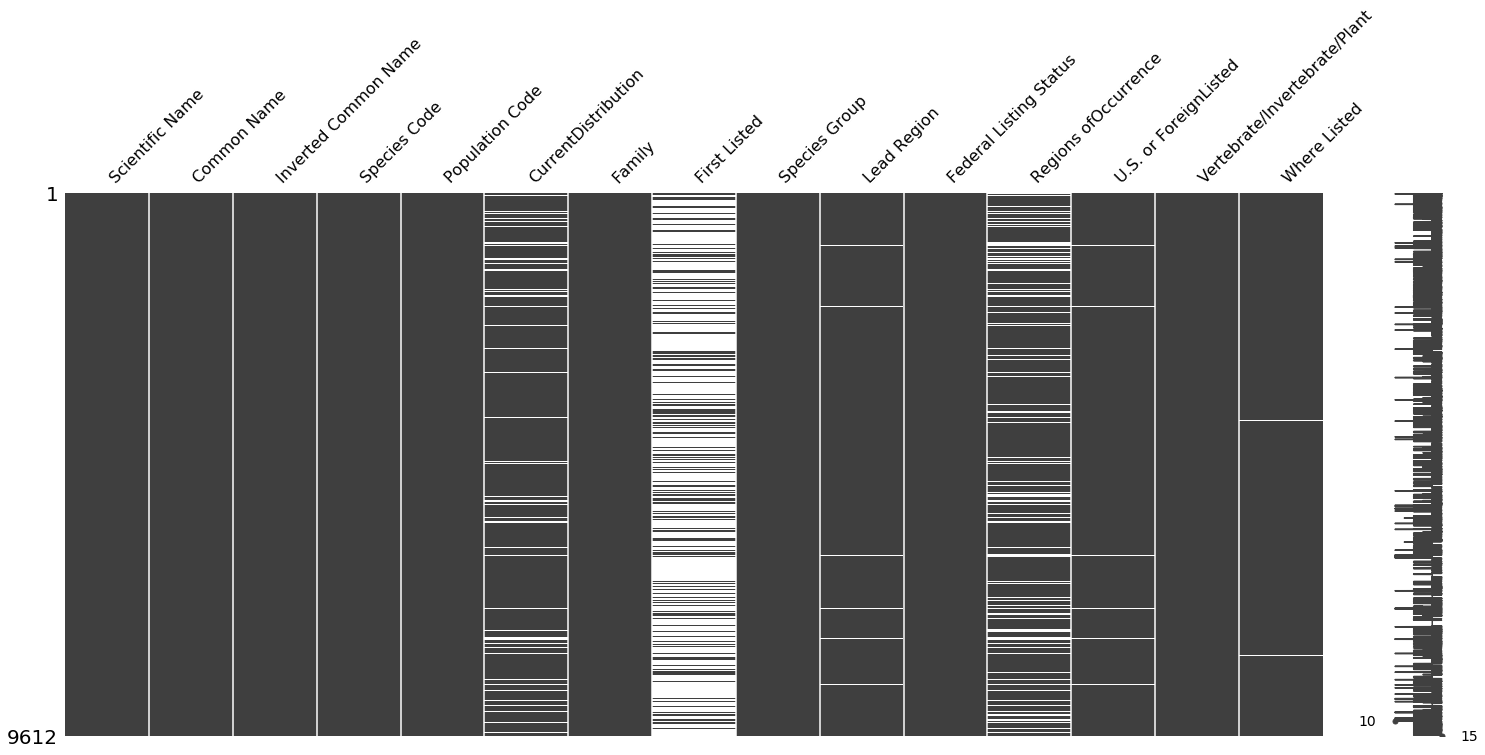

In [3]:
# check species data for null values
print(species.isnull().sum())

# visualize null values
msno.matrix(species)

### Feature Consideration

In [4]:
# print unique values in each column
for column in species.columns:
    print(column + ': ' + str(len(species[column].unique())))

Scientific Name: 9318
Common Name: 7129
Inverted Common Name: 7108
Species Code: 9430
Population Code: 20
CurrentDistribution: 1678
Family: 900
First Listed: 638
Species Group: 20
Lead Region: 12
Federal Listing Status: 19
Regions ofOccurrence: 58
U.S. or ForeignListed: 4
Vertebrate/Invertebrate/Plant: 3
Where Listed: 322


In [5]:
# drop uninformative columns
species = species.drop(['Scientific Name',
                        'Common Name',
                        'Inverted Common Name',
                        'Species Code',
                        'Population Code',
                        'First Listed',
                        'Regions ofOccurrence',
                        'U.S. or ForeignListed',
                        'Where Listed'], axis=1)

In [6]:
# simplify column names
species.columns = ['Distribution',
                   'Family',
                   'Group',
                   'Region',
                   'Federal Listing Status',
                   'VIP']

In [7]:
print(species.shape)
species.head()

(9612, 6)


,Distribution,Family,Group,Region,Federal Listing Status,VIP
0,"NC, VA;",Pinaceae,Conifers and Cycads,4,Not Listed,P
1,"Mexico, Honduras, Guatemala, El Salvador",Pinaceae,Conifers and Cycads,Foreign,Threatened,P
2,CA;,Asilidae,Insects,1,Not Listed,I
3,CA;,Nyctaginaceae,Flowering Plants,8,Not Listed,P
4,NaN,Nyctaginaceae,Flowering Plants,6,Not Listed,P


### Handling Missing Records

Distribution              860
Family                      0
Group                       0
Region                     73
Federal Listing Status      0
VIP                         0
dtype: int64


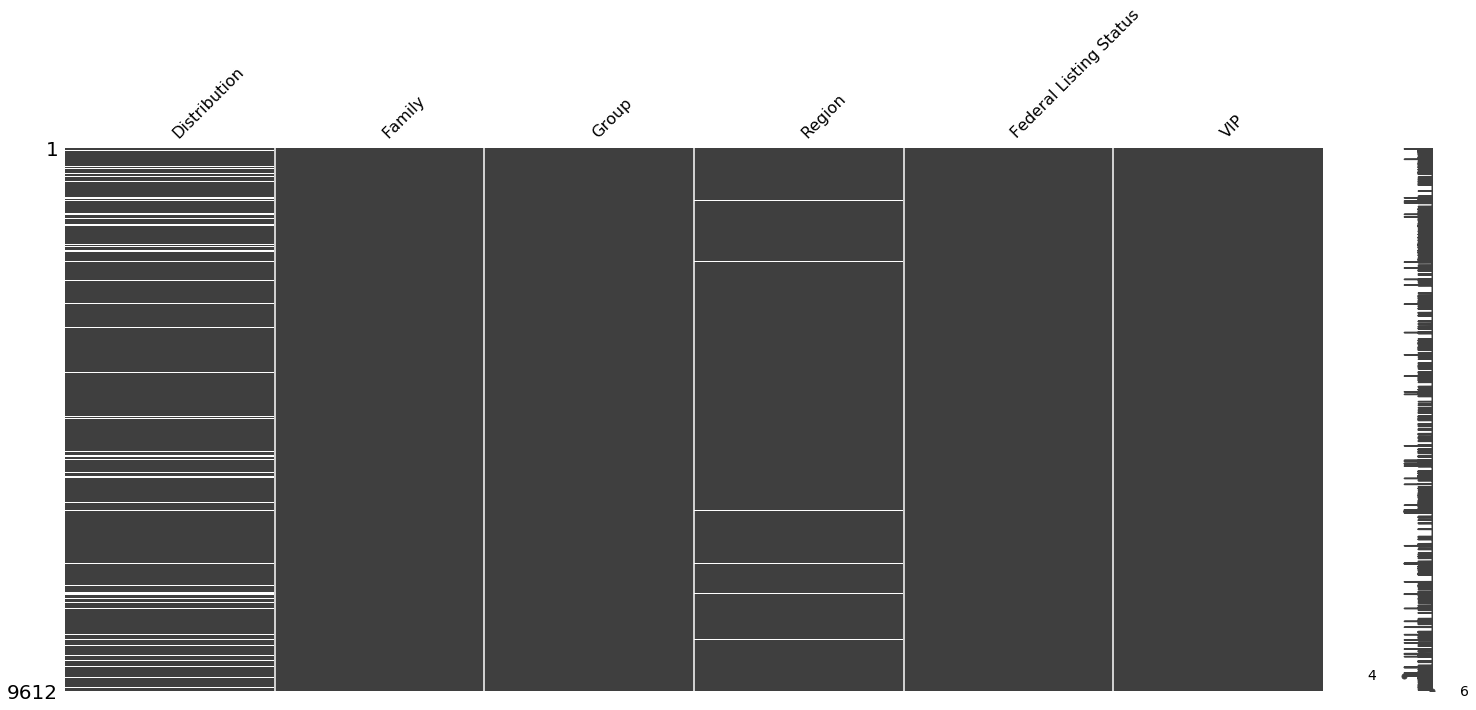

In [8]:
# check species data for null values
print(species.isnull().sum())

# visualize null values
msno.matrix(species)

In [9]:
# ~10% of records that do not have geographic information
print(species.isnull().sum().sum() / species.shape[0])

# drop records without geographic information
species = species.dropna()

0.0970661672908864


In [10]:
print(species.shape)
species.head()

(8751, 6)


,Distribution,Family,Group,Region,Federal Listing Status,VIP
0,"NC, VA;",Pinaceae,Conifers and Cycads,4,Not Listed,P
1,"Mexico, Honduras, Guatemala, El Salvador",Pinaceae,Conifers and Cycads,Foreign,Threatened,P
2,CA;,Asilidae,Insects,1,Not Listed,I
3,CA;,Nyctaginaceae,Flowering Plants,8,Not Listed,P
6,WY;,Nyctaginaceae,Flowering Plants,6,Not Listed,P


### Stacking Records into Schema

In [11]:
# unique families
species['Family'].value_counts()

Asteraceae          639
Fabaceae            377
Brassicaceae        253
Scrophulariaceae    207
Unionidae           200
Polygonaceae        172
Lamiaceae           158
Hydrobiidae         153
Liliaceae           141
Cyprinidae          131
Poaceae             126
Campanulaceae       119
Carabidae           112
Gesneriaceae        109
Cactaceae           108
Cambaridae          108
Apiaceae            107
Caryophyllaceae      99
Pleuroceridae        98
Muridae              86
Rubiaceae            82
Euphorbiaceae        81
Rosaceae             79
Malvaceae            78
Percidae             77
Cyperaceae           77
Boraginaceae         74
Rutaceae             71
Ranunculaceae        71
Salmonidae           68
                   ... 
Alcedinidae           1
Craseonycteridae      1
Bagridae              1
Procellidae           1
cyprinodontidae       1
Amphiumidae           1
Cacatacea             1
Artemiidae            1
Acroceridae           1
Hamamelidaceae        1
Chinchillidae   

In [12]:
# unique species groups
species['Group'].value_counts()

Flowering Plants            4584
Insects                     1063
Mammals                      660
Snails                       506
Birds                        475
Fishes                       429
Reptiles                     257
Crustaceans                  230
Clams                        203
Amphibians                   138
Ferns and Allies              95
Arachnids                     50
Conifers and Cycads           22
Lichens                       17
Flatworms and Roundworms       8
Sponges                        7
Corals                         3
Annelid Worms                  2
Millipedes                     1
Hydroids                       1
Name: Group, dtype: int64

In [13]:
# unique species types
species['VIP'].value_counts()

P    4718
I    2074
V    1959
Name: VIP, dtype: int64

In [14]:
# unique current distribution
print(species['Region'].value_counts())

# drop species in foreign geographic regions
species = species[species['Region'] != 'Foreign']

# drop species in geographic region 9 (not documented)
species = species[species['Region'] != '9']

1          3531
4          1804
2           989
Foreign     624
6           615
8           480
5           355
3           211
7            76
NMFS         65
9             1
Name: Region, dtype: int64


In [15]:
# list of US states
state_abbrevs = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# stack records with multiple US states in current distribution
species_stack = pd.DataFrame(columns=species.columns)

for abbrev in state_abbrevs:
    state = species[species['Distribution'].str.contains(abbrev)]
    state = state.assign(State=abbrev)
    species_stack = species_stack.append(state, ignore_index=True, sort=False)
    
# drop current distribution
species = species_stack.drop(['Distribution'], axis=1)

# unique state distribution
print(species['State'].value_counts())

CA    1762
HI    1513
FL     607
TX     585
AL     566
OR     480
AZ     478
NV     475
UT     451
TN     446
NC     425
GA     419
VA     349
NM     275
WA     253
CO     238
KY     234
SC     223
AR     202
MS     188
ID     187
IL     174
MO     168
WV     160
IN     156
PA     153
OH     147
WY     144
NY     138
LA     129
OK     126
MI     119
WI     116
MD     112
MT     109
MN     102
AK      96
DE      95
NJ      93
IA      92
MA      87
KS      80
ME      70
NH      65
NE      61
CT      59
SD      56
VT      51
ND      40
RI      37
Name: State, dtype: int64


In [16]:
# unique federal listing status
print(species['Federal Listing Status'].value_counts())

# combine proposed endangered with endangered, proposed threatened with threatened
species.loc[species['Federal Listing Status'] == 'Proposed Threatened', 'Federal Listing Status'] = 'Threatened'
species.loc[species['Federal Listing Status'] == 'Proposed Endangered', 'Federal Listing Status'] = 'Endangered'

# keep records for endangered, not listed and threatened species
species = species[(species['Federal Listing Status'] == 'Endangered') |
                  (species['Federal Listing Status'] == 'Not Listed') |
                  (species['Federal Listing Status'] == 'Threatened')]

Not Listed                                                 9074
Endangered                                                 1901
Under Review in the Candidate or Petition Process          1073
Threatened                                                  817
Experimental Population, Non-Essential                      260
Recovery                                                     83
Proposed Threatened                                          62
Similarity of Appearance to a Threatened Taxon               40
Candidate                                                    34
Extinction                                                   17
Original Data in Error - Taxonomic Revision                   9
Original Data in Error - New Information Discovered           9
Original Data in Error - Not a listable entity                7
Proposed Endangered                                           3
Proposed Similarity of Appearance to a Threatened Taxon       1
Original Data in Error - Act Amendment  

In [17]:
print(species['Federal Listing Status'].value_counts())

Not Listed    9074
Endangered    1904
Threatened     879
Name: Federal Listing Status, dtype: int64


In [18]:
# drop duplicate rows
species = species.drop_duplicates()

In [19]:
print(species.shape)
species.head()

(5475, 6)


,Family,Group,Region,Federal Listing Status,VIP,State
0,Accipitridae,Birds,2,Not Listed,V,AL
1,Acipenseridae,Fishes,3,Not Listed,V,AL
2,Acipenseridae,Fishes,4,Threatened,V,AL
3,Sericostomatidae,Insects,4,Not Listed,I,AL
4,Rosaceae,Flowering Plants,4,Not Listed,P,AL


Family                    0
Group                     0
Region                    0
Federal Listing Status    0
VIP                       0
State                     0
dtype: int64


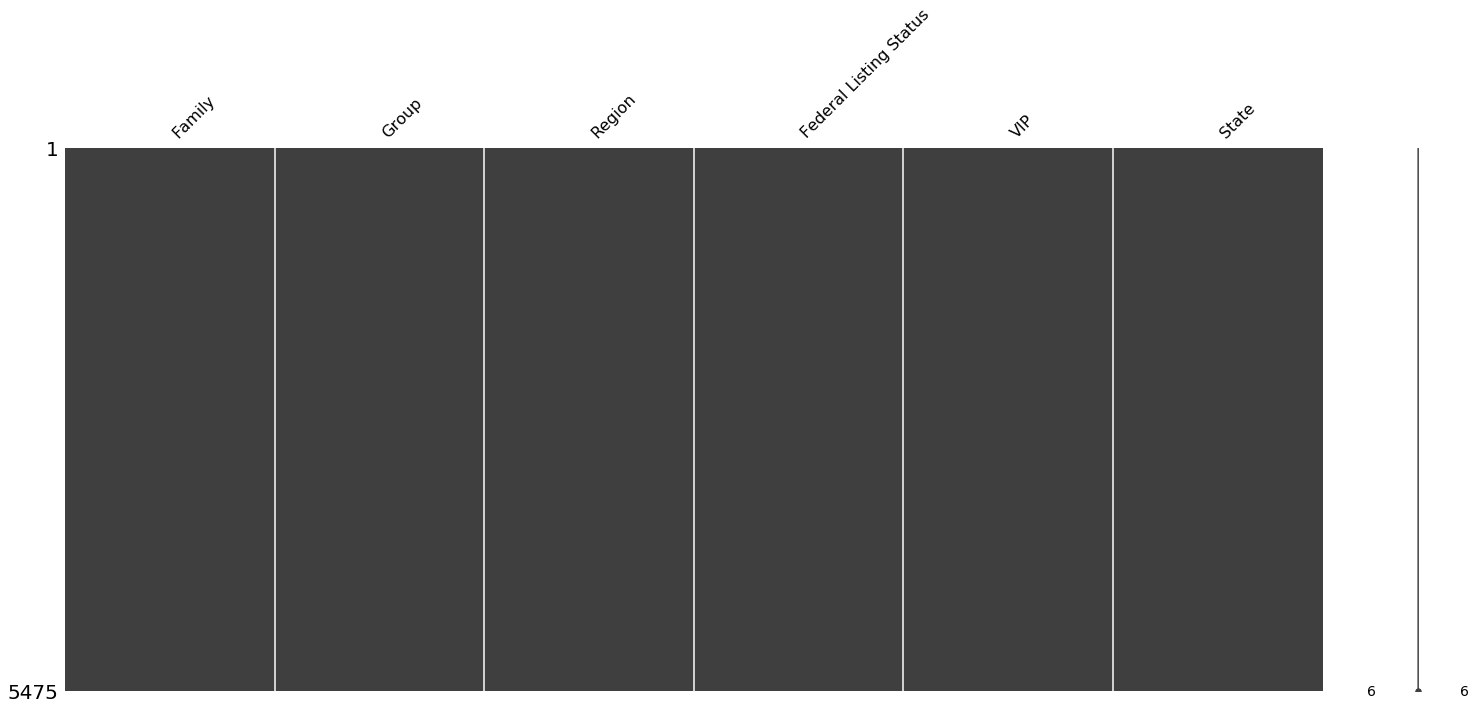

In [20]:
# check species data for null values
print(species.isnull().sum())

# visualize null values
msno.matrix(species)

### Data Loading

In [21]:
species.to_pickle("../Data/FWS.pkl")